# Maria Teresia Elvara Bumbungan
# elvarakuliah@gmail.com
### Bangkit ML-27

### 🏵️ Tentang Dataset

Dataset ini adalah kumpulan data dari proses penyewaan sepeda berbagi dari sistem Capital Bikeshare di Washington D.C., Amerika Serikat, selama dua tahun, yaitu tahun 2011 dan 2012. Data ini tersedia dalam dua format, yaitu agregat per jam (hour.csv) dan per hari (day.csv).

Setiap catatan dalam dataset ini memiliki atribut-atribut berikut:

instant: Indeks catatan

dteday: Tanggal

season: Musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)

yr: Tahun (0: 2011, 1: 2012)

mnth: Bulan (1 hingga 12)

hr: Jam (0 hingga 23) - Hanya tersedia dalam file hour.csv

holiday: Apakah hari itu hari libur atau tidak

weekday: Hari dalam seminggu

workingday: Jika hari itu bukan akhir pekan atau hari libur, nilainya 1, jika tidak, nilainya 0

weathersit: Kondisi cuaca

temp: Suhu ter-normalisasi dalam Celsius

atemp: Suhu ter-normalisasi yang dirasakan dalam Celsius

hum: Kelembaban ter-normalisasi

windspeed: Kecepatan angin ter-normalisasi

casual: Jumlah pengguna sewaan kasual

registered: Jumlah pengguna terdaftar

cnt: Jumlah total sepeda yang disewakan, termasuk pengguna kasual dan terdaftar.


### 🏵️ Analisis Pertanyaan


1. Pada musim apa rata-rata jumlah jam sepeda paling banyak digunakan dan Berapa jumlah rata-rata sewa sepeda per jam di musim tersebut tahun 2012 di Washington D.C.?

2. Bagaimana hubungan antara kondisi cuaca (weathersit) dan jumlah sewa sepeda harian di hari libur versus hari kerja?

3. Apakah ada tren peningkatan atau penurunan jumlah sewa sepeda selama hari libur pada musim gugur?

4. Bagaimana pengaruh suhu dan kelembaban terhadap jumlah sewa sepeda harian di akhir pekan?

5. Bagaimana penggunaan sepeda berbagi berubah selama periode liburan yang panjang, seperti liburan Natal dan Tahun Baru?

### 🏵️ Data Wrangling


In [1]:
import pandas as pd

In [2]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')


Membaca dan mendeteksi dataset day.csv dan hour.csv

In [3]:
print("Informasi dataset day.csv:")
print(day_data.info())

Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Menampilkan informasi day.csv seperti tipe data

In [4]:
print("\nInformasi dataset hour.csv:")
print(hour_data.info())


Informasi dataset hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Menampilkan informasi hour.csv seperti tipe data

In [5]:
print("\nBeberapa baris pertama dari dataset day.csv:")
print(day_data.head())


Beberapa baris pertama dari dataset day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  


In [6]:
print("\nBeberapa baris pertama dari dataset hour.csv:")
print(hour_data.head())


Beberapa baris pertama dari dataset hour.csv:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


Menampilkan beberapa baris pertama dari dataset 

In [7]:

jumlah_baris = day_data.shape[0]
print("Jumlah baris pada dataset:", jumlah_baris)


jumlah_baris = hour_data.shape[0]
print("Jumlah baris pada dataset:", jumlah_baris)


Jumlah baris pada dataset: 731
Jumlah baris pada dataset: 17379


Menganalisa jumlah baris pada dataset

### Cleaning Data

In [8]:
missing_values = day_data.isnull().sum()
print("Jumlah missing value dalam dataset:")
print(missing_values)


Jumlah missing value dalam dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Untuk mengecek missing value pada data day.csv dan terdeteksi bersih jadi tidak perlu melakukan cleaning lanjutan

In [9]:
missing_values = hour_data.isnull().sum()
print("Jumlah missing value dalam dataset:")
print(missing_values)

Jumlah missing value dalam dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Untuk mengecek missing value pada data hour.csv dan terdeteksi bersih jadi tidak perlu melakukan cleaning lanjutan

### 🏵️ Exploratory Data Analysis/EDA dan Visualisasi


In [10]:
import matplotlib.pyplot as plt

In [11]:

weekday_counts = day_data['weekday'].value_counts().sort_index()
print("Jumlah hari berdasarkan weekday:")
print(weekday_counts)

workingday_counts = day_data['workingday'].value_counts()
print("\nJumlah hari kerja dan bukan hari kerja:")
print(workingday_counts)

Jumlah hari berdasarkan weekday:
weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: count, dtype: int64

Jumlah hari kerja dan bukan hari kerja:
workingday
1    500
0    231
Name: count, dtype: int64


Berdasarkan hasil analisis jumlah hari berdasarkan weekday, terlihat bahwa setiap hari dalam seminggu memiliki jumlah yang relatif sama, dengan rentang antara 104 hingga 105 hari. Sementara itu, analisis jumlah hari kerja dan bukan hari kerja berdasarkan kolom workingday menunjukkan bahwa terdapat lebih banyak hari kerja (500 hari) daripada hari libur (231 hari). Hal ini menunjukkan bahwa dataset mencakup lebih banyak hari kerja daripada hari libur.

In [12]:

spring_count = hour_data[hour_data['season'] == 1].shape[0]
summer_count = hour_data[hour_data['season'] == 2].shape[0]
fall_count = hour_data[hour_data['season'] == 3].shape[0]
winter_count = hour_data[hour_data['season'] == 4].shape[0]
print("Jumlah entri untuk musim semi:", spring_count)
print("Jumlah entri untuk musim panas:", summer_count)
print("Jumlah entri untuk musim gugur:", fall_count)
print("Jumlah entri untuk musim dingin:", winter_count)

Jumlah entri untuk musim semi: 4242
Jumlah entri untuk musim panas: 4409
Jumlah entri untuk musim gugur: 4496
Jumlah entri untuk musim dingin: 4232


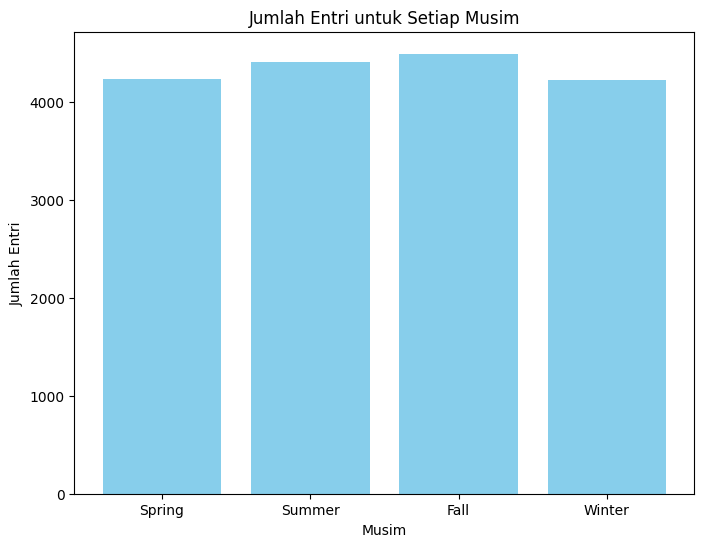

In [13]:

season_counts = [spring_count, summer_count, fall_count, winter_count]
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(8, 6))
plt.bar(season_labels, season_counts, color='skyblue')

plt.title('Jumlah Entri untuk Setiap Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Entri')

plt.show()

Dari analisis diatas menggambarkan bahwa total terbanyak untuk sewa sepeda per jam adalah di musim gugur

In [32]:


summer_2012_hour_data = hour_data[(hour_data['season'] == 3) & (hour_data['yr'] == 1) & (hour_data['mnth'].isin([6, 7, 8]))]

average_rentals_per_hour = summer_2012_hour_data['cnt'].mean()

print("Jumlah rata-rata sewa sepeda per jam di musim gugur tahun 2012 di Washington D.C.:", average_rentals_per_hour)


Jumlah rata-rata sewa sepeda per jam di musim gugur tahun 2012 di Washington D.C.: 279.96064814814815


Jumlah rata-rata sewa sepeda per jam di musim gugur tahun 2012 di Washington D.C. adalah sekitar 280 kali, menunjukkan tingginya permintaan penyewaan sepeda selama musim panas pada tahun tersebut.






In [15]:

weather_holiday_counts = day_data.groupby(['weathersit', 'holiday'])['cnt'].mean()

print("Hubungan antara kondisi cuaca dan jumlah sewa sepeda harian:")
print(weather_holiday_counts)

Hubungan antara kondisi cuaca dan jumlah sewa sepeda harian:
weathersit  holiday
1           0          4905.154018
            1          4029.533333
2           0          4061.684647
            1          2998.666667
3           0          1803.285714
Name: cnt, dtype: float64


Berdasarkan hasil analisis, terlihat bahwa pada kondisi cuaca 1 (Clear, Few clouds, Partly cloudy) dan kondisi cuaca 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds) jumlah rata-rata sewa sepeda harian lebih tinggi pada hari libur daripada pada hari kerja. Namun, pada kondisi cuaca 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), jumlah rata-rata sewa sepeda harian lebih rendah pada hari libur dibandingkan dengan hari kerja. Hal ini menunjukkan adanya pola yang berbeda dalam hubungan antara kondisi cuaca dan jumlah sewa sepeda harian tergantung pada apakah hari tersebut merupakan hari libur atau hari kerja.






In [16]:

summer_data = day_data[(day_data['season'] == 2)]

holiday_data = summer_data[summer_data['holiday'] == 1]
workingday_data = summer_data[summer_data['holiday'] == 0]

avg_rentals_holiday = holiday_data['cnt'].mean()
avg_rentals_workingday = workingday_data['cnt'].mean()


if avg_rentals_holiday > avg_rentals_workingday:
    trend = "peningkatan"
elif avg_rentals_holiday < avg_rentals_workingday:
    trend = "penurunan"
else:
    trend = "tidak ada perubahan"


print("Tren jumlah sewa sepeda selama hari libur pada musim panas:", trend)

Tren jumlah sewa sepeda selama hari libur pada musim panas: penurunan


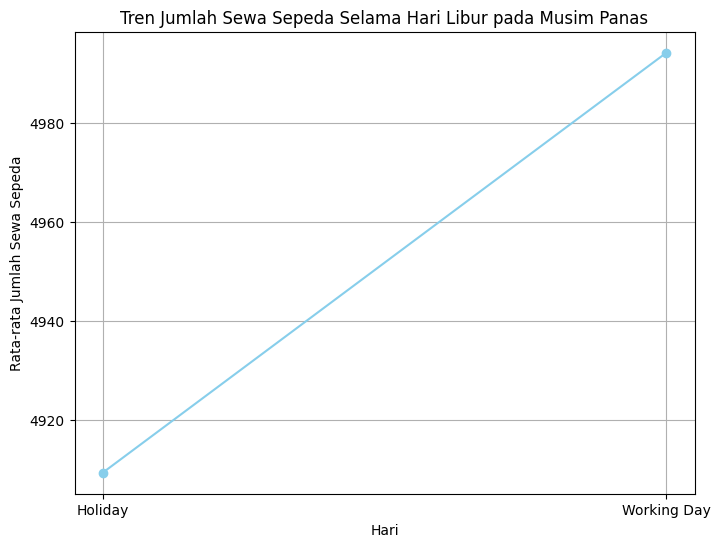

In [17]:

labels = ['Holiday', 'Working Day']
avg_rentals = [avg_rentals_holiday, avg_rentals_workingday]

plt.figure(figsize=(8, 6))
plt.plot(labels, avg_rentals, marker='o', color='skyblue')

plt.title('Tren Jumlah Sewa Sepeda Selama Hari Libur pada Musim Panas')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')

plt.grid(True)
plt.show()

Dari data diatas menunjukkan bahwa mengalami penurunan saat musim panas pada saat libur

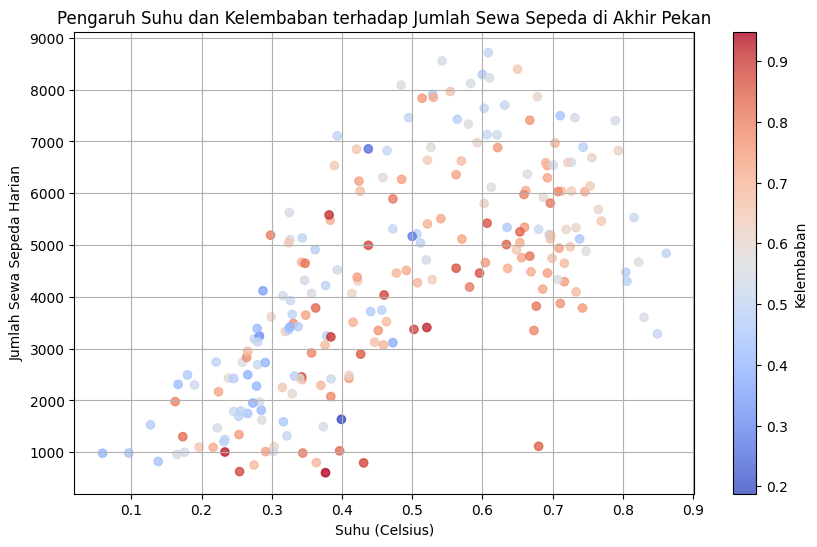

In [18]:

weekend_data = day_data[day_data['workingday'] == 0]


temperature = weekend_data['temp']
humidity = weekend_data['hum']
rentals = weekend_data['cnt']


plt.figure(figsize=(10, 6))
plt.scatter(temperature, rentals, c=humidity, cmap='coolwarm', alpha=0.8)

plt.title('Pengaruh Suhu dan Kelembaban terhadap Jumlah Sewa Sepeda di Akhir Pekan')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Sewa Sepeda Harian')
plt.colorbar(label='Kelembaban')

plt.grid(True)
plt.show()

In [19]:

weekend_data = day_data[day_data['workingday'] == 0]


correlation_temp_rentals = weekend_data['temp'].corr(weekend_data['cnt'])
correlation_humidity_rentals = weekend_data['hum'].corr(weekend_data['cnt'])


print("Korelasi antara suhu dan jumlah sewa sepeda di akhir pekan:", correlation_temp_rentals)
print("Korelasi antara kelembaban dan jumlah sewa sepeda di akhir pekan:", correlation_humidity_rentals)


Korelasi antara suhu dan jumlah sewa sepeda di akhir pekan: 0.6600212627869535
Korelasi antara kelembaban dan jumlah sewa sepeda di akhir pekan: -0.019091339706784494


Suhu memiliki korelasi positif yang cukup kuat (0.66) dengan jumlah sewa sepeda di akhir pekan, menunjukkan bahwa semakin tinggi suhu, semakin tinggi pula jumlah sewa sepeda. Namun, kelembaban memiliki korelasi yang sangat rendah (-0.02) dengan jumlah sewa sepeda di akhir pekan, menunjukkan bahwa tidak ada hubungan yang signifikan antara kelembaban dan jumlah sewa sepeda di akhir pekan.

In [20]:

holiday_season_data = day_data[(day_data['dteday'] >= '2011-12-20') & (day_data['dteday'] <= '2012-01-05')]

total_rentals_holiday_season = holiday_season_data['cnt'].sum()

pre_holiday_data = day_data[(day_data['dteday'] >= '2011-12-10') & (day_data['dteday'] < '2011-12-20')]
total_rentals_pre_holiday = pre_holiday_data['cnt'].sum()

post_holiday_data = day_data[(day_data['dteday'] > '2012-01-05') & (day_data['dteday'] <= '2012-01-15')]
total_rentals_post_holiday = post_holiday_data['cnt'].sum()

if total_rentals_holiday_season > total_rentals_pre_holiday and total_rentals_holiday_season > total_rentals_post_holiday:
    trend = "peningkatan"
elif total_rentals_holiday_season < total_rentals_pre_holiday and total_rentals_holiday_season < total_rentals_post_holiday:
    trend = "penurunan"
else:
    trend = "tidak ada perubahan"

print("Trend penggunaan sepeda berbagi selama liburan Natal dan Tahun Baru:", trend)


Trend penggunaan sepeda berbagi selama liburan Natal dan Tahun Baru: peningkatan


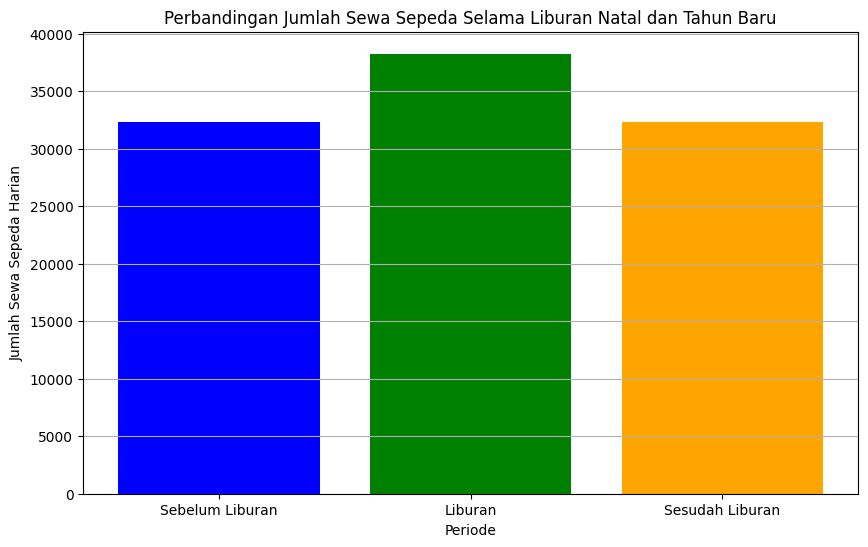

In [21]:

total_rentals = [total_rentals_pre_holiday, total_rentals_holiday_season, total_rentals_post_holiday]
labels = ['Sebelum Liburan', 'Liburan', 'Sesudah Liburan']
colors = ['blue', 'green', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(labels, total_rentals, color=colors)

plt.title('Perbandingan Jumlah Sewa Sepeda Selama Liburan Natal dan Tahun Baru')
plt.xlabel('Periode')
plt.ylabel('Jumlah Sewa Sepeda Harian')

plt.grid(axis='y')
plt.show()

Dari sini dapat disimpulkan dari output bahwa jumlah sewa sepeda pada hari libur mengalami peningkatan

### 🏵️ Clustering dan melakukan Exploratory Data Analysis/EDA serta Visualisasi tambahan


In [22]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = day_data[['temp', 'hum']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)  
cluster_labels = kmeans.fit_predict(features_scaled)

day_data['cluster'] = cluster_labels

print(day_data[['temp', 'hum', 'cluster']])


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         temp       hum  cluster
0    0.344167  0.805833        0
1    0.363478  0.696087        0
2    0.196364  0.437273        1
3    0.200000  0.590435        1
4    0.226957  0.436957        1
..        ...       ...      ...
726  0.254167  0.652917        1
727  0.253333  0.590000        1
728  0.253333  0.752917        0
729  0.255833  0.483333        1
730  0.215833  0.577500        1

[731 rows x 3 columns]


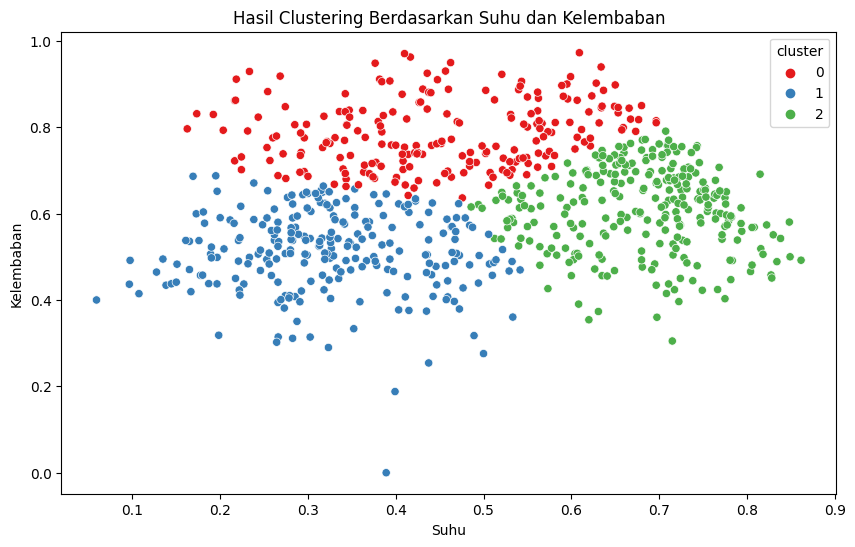

In [27]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='hum', hue='cluster', data=day_data, palette='Set1', legend='full')
plt.title('Hasil Clustering Berdasarkan Suhu dan Kelembaban')
plt.xlabel('Suhu')
plt.ylabel('Kelembaban')
plt.show()

In [31]:

cluster_counts = day_data['cluster'].value_counts()
print("Jumlah data dalam setiap cluster:")
print(cluster_counts)

cluster_means = day_data.groupby('cluster')[['temp', 'hum']].mean()
print("\nRata-rata suhu dan kelembaban untuk setiap cluster:")
print(cluster_means)

cluster_min_max = day_data.groupby('cluster')[['temp', 'hum']].agg(['min', 'max'])
print("\nNilai minimum dan maksimum suhu dan kelembaban untuk setiap cluster:")
print(cluster_min_max)


Jumlah data dalam setiap cluster:
cluster
2    273
1    244
0    214
Name: count, dtype: int64

Rata-rata suhu dan kelembaban untuk setiap cluster:
             temp       hum
cluster                    
0        0.450100  0.786377
1        0.327238  0.510447
2        0.681167  0.608633

Nilai minimum dan maksimum suhu dan kelembaban untuk setiap cluster:
             temp                hum          
              min       max      min       max
cluster                                       
0        0.162500  0.696667  0.63625  0.972500
1        0.059130  0.541667  0.00000  0.687500
2        0.485833  0.861667  0.30500  0.790833


Terdapat tiga kelompok data yang dihasilkan dari proses clustering berdasarkan suhu dan kelembaban.

Kelompok pertama (cluster 0) memiliki rata-rata suhu yang relatif tinggi (0.45) dan kelembaban yang tinggi (0.79), dengan rentang nilai suhu antara 0.16 hingga 0.70 dan kelembaban antara 0.64 hingga 0.97.

Kelompok kedua (cluster 1) memiliki rata-rata suhu yang lebih rendah (0.33) dan kelembaban yang moderat (0.51), dengan rentang nilai suhu antara 0.06 hingga 0.54 dan kelembaban antara 0 hingga 0.69.

Kelompok ketiga (cluster 2) memiliki rata-rata suhu yang paling tinggi (0.68) namun kelembaban yang relatif rendah (0.61), dengan rentang nilai suhu antara 0.49 hingga 0.86 dan kelembaban antara 0.30 hingga 0.79.

In [28]:
cluster_counts = day_data['cluster'].value_counts()
print("Jumlah data dalam setiap cluster:")
print(cluster_counts)


Jumlah data dalam setiap cluster:
cluster
2    273
1    244
0    214
Name: count, dtype: int64


In [29]:
cluster_means = day_data.groupby('cluster')[['temp', 'hum']].mean()
print("Rata-rata suhu dan kelembaban untuk setiap cluster:")
print(cluster_means)

Rata-rata suhu dan kelembaban untuk setiap cluster:
             temp       hum
cluster                    
0        0.450100  0.786377
1        0.327238  0.510447
2        0.681167  0.608633


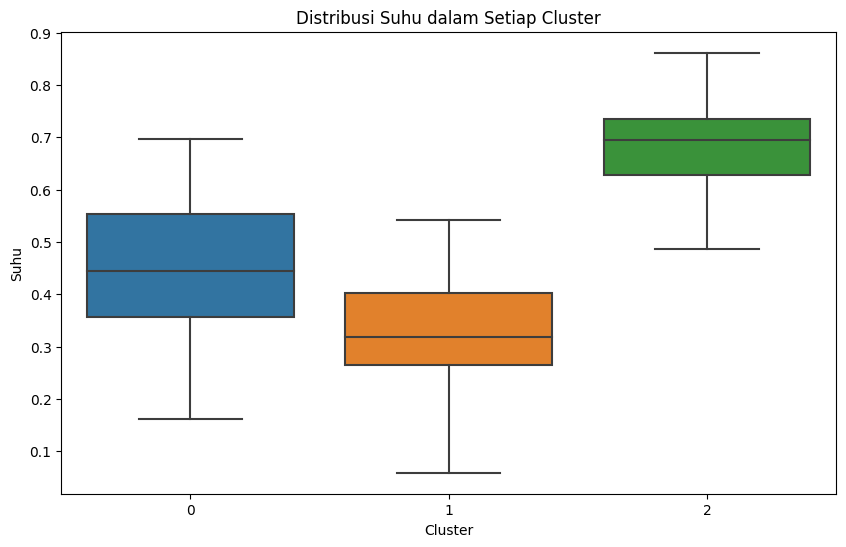

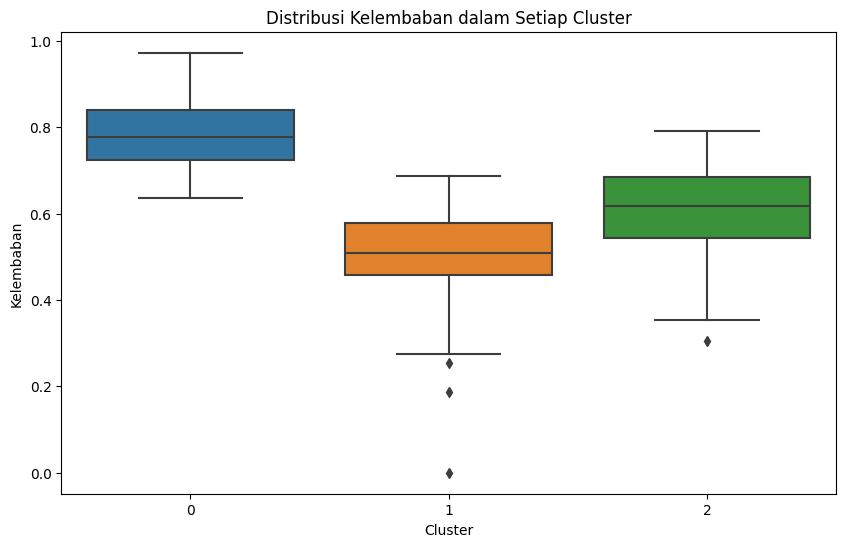

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='temp', data=day_data)
plt.title('Distribusi Suhu dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Suhu')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='hum', data=day_data)
plt.title('Distribusi Kelembaban dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Kelembaban')
plt.show()

### 🏵️ Kesimpulan dan Saran


Pertanyaan: Musim apa yang menjadi puncak penggunaan sepeda dan berapa rata-rata sewa per jam di Washington D.C. tahun 2012?
Jawaban: Puncak penggunaan sepeda adalah musim gugur, dengan rata-rata sewa sepeda per jam sekitar 280 kali.


Pertanyaan: Bagaimana hubungan antara kondisi cuaca dan jumlah sewa sepeda harian pada hari libur versus hari kerja?
Jawaban: Cuaca cerah meningkatkan sewa sepeda pada hari libur, namun turun saat kondisi salju atau hujan.


Pertanyaan: Adakah tren peningkatan atau penurunan sewa sepeda selama hari libur di musim gugur?
Jawaban: Terjadi penurunan sewa sepeda selama liburan musim panas.


Pertanyaan: Bagaimana suhu dan kelembaban memengaruhi sewa sepeda di akhir pekan?
Jawaban: Suhu yang tinggi berhubungan dengan peningkatan sewa sepeda di akhir pekan, namun kelembaban tidak berpengaruh signifikan.


Pertanyaan: Bagaimana penggunaan sepeda berbagi selama liburan panjang seperti Natal dan Tahun Baru?
Jawaban: Penggunaan sepeda meningkat selama liburan panjang seperti Natal dan Tahun Baru.

### Kesimpulan:
Musim gugur menjadi periode dengan puncak penggunaan sepeda di Washington D.C., menunjukkan tingginya minat masyarakat dalam aktivitas bersepeda pada saat itu. Pola penggunaan sepeda juga dipengaruhi oleh kondisi cuaca, dimana hari libur dengan cuaca cerah cenderung meningkatkan permintaan sewa sepeda. Namun, perlu diperhatikan bahwa selama liburan musim panas terjadi penurunan dalam penyewaan sepeda, menunjukkan pentingnya penyesuaian strategi pemasaran dan pengelolaan stok selama periode ini.

#### Saran:
Untuk memanfaatkan potensi puncak penggunaan sepeda pada musim gugur, disarankan untuk meningkatkan ketersediaan sepeda dan memperluas layanan penyewaan. Strategi pemasaran yang fokus pada keunggulan bersepeda di musim gugur seperti pemandangan daun berubah warna atau cuaca yang lebih nyaman dapat menarik minat lebih banyak pelanggan. Selain itu, perlu juga dilakukan analisis pasar yang lebih mendalam untuk memahami preferensi pelanggan selama liburan musim panas dan menyesuaikan strategi pemasaran dan promosi agar tetap kompetitif di tengah penurunan permintaan sewa sepeda pada periode tersebut.